In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import PIL
from tensorflow import keras

In [20]:
train_dir = 'D:\\dataset\\train'
test_dir = 'D:\\dataset\\test'

In [21]:
num_train = 0
counts = {}
for root, dirs, files in os.walk(train_dir):
    if not dirs:
        print(f'{root}: {len(files)}')
        counts[root] = len(files)
        num_train += len(files)
print(f'Total = {num_train}')

D:\dataset\train\abelha: 1068
D:\dataset\train\aranha: 1206
D:\dataset\train\bicicleta: 1074
D:\dataset\train\borboleta: 769
D:\dataset\train\cachorro: 1001
D:\dataset\train\carro: 1155
D:\dataset\train\cavalo: 1067
D:\dataset\train\coelho: 952
D:\dataset\train\dente-de-leao: 922
D:\dataset\train\elefante: 1092
D:\dataset\train\esquilo: 1038
D:\dataset\train\gafanhoto: 830
D:\dataset\train\galinha: 1014
D:\dataset\train\gato: 1001
D:\dataset\train\girafa: 1057
D:\dataset\train\girassol: 603
D:\dataset\train\hamster: 673
D:\dataset\train\joaninha: 734
D:\dataset\train\leao: 912
D:\dataset\train\libelula: 906
D:\dataset\train\margarida: 634
D:\dataset\train\monitor: 112
D:\dataset\train\mosquito: 560
D:\dataset\train\moto: 564
D:\dataset\train\mouse: 50
D:\dataset\train\ovelha: 1098
D:\dataset\train\panda: 760
D:\dataset\train\rosa: 654
D:\dataset\train\tartaruga: 1026
D:\dataset\train\teclado: 49
D:\dataset\train\tulipa: 854
D:\dataset\train\vaca: 1104
D:\dataset\train\veado: 1036
D:\da

In [22]:
num_val = 0
counts = {}
for root, dirs, files in os.walk(test_dir):
    if not dirs:
        print(f'{root}: {len(files)}')
        counts[root] = len(files)
        num_val += len(files)
print(f'Total = {num_val}')

D:\dataset\test\abelha: 119
D:\dataset\test\aranha: 123
D:\dataset\test\bicicleta: 120
D:\dataset\test\borboleta: 130
D:\dataset\test\cachorro: 255
D:\dataset\test\carro: 251
D:\dataset\test\cavalo: 120
D:\dataset\test\coelho: 136
D:\dataset\test\dente-de-leao: 130
D:\dataset\test\elefante: 119
D:\dataset\test\esquilo: 114
D:\dataset\test\gafanhoto: 130
D:\dataset\test\galinha: 110
D:\dataset\test\gato: 255
D:\dataset\test\girafa: 145
D:\dataset\test\girassol: 130
D:\dataset\test\hamster: 106
D:\dataset\test\joaninha: 130
D:\dataset\test\leao: 107
D:\dataset\test\libelula: 130
D:\dataset\test\margarida: 130
D:\dataset\test\monitor: 13
D:\dataset\test\mosquito: 130
D:\dataset\test\moto: 108
D:\dataset\test\mouse: 10
D:\dataset\test\ovelha: 120
D:\dataset\test\panda: 114
D:\dataset\test\rosa: 130
D:\dataset\test\tartaruga: 114
D:\dataset\test\teclado: 11
D:\dataset\test\tulipa: 130
D:\dataset\test\vaca: 114
D:\dataset\test\veado: 308
D:\dataset\test\zebra: 140
Total = 4432


In [23]:
IMAGE_SIZE = [130, 130]
#instanciamento do modelo VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [24]:
for layer in vgg.layers:
    layer.trainable = False

In [26]:
#adicionando novas camadas para a rede
x = vgg.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
#camada de exclusao: ativa e desativa unidades de entrada, no que ajuda a evitar overfitting
prediction = Dropout(0.25)(prediction)
prediction = Dense(34, activation='softmax')(x)

In [27]:
#juntando os modelos, formando um novo modelo
model = Model(inputs=vgg.input, outputs=prediction)

In [28]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 130, 130, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 130, 130, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 130, 130, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 65, 65, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 65, 65, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 65, 65, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [31]:
#padronização e gera o conjunto de dados desejado
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=1337,
  image_size=(130, 130),
  batch_size=10)

Found 28673 files belonging to 34 classes.
Found 28673 images belonging to 34 classes.
Found 4432 images belonging to 34 classes.


In [32]:
#padronização e gera o conjunto de dados desejado
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=1337,
  image_size=(130, 130),
  batch_size=2)


Found 4432 files belonging to 34 classes.


In [33]:
#separa os nomes das classes do dataset utilizado
class_names = train_generator.class_names
print(class_names)

['abelha', 'aranha', 'bicicleta', 'borboleta', 'cachorro', 'carro', 'cavalo', 'coelho', 'dente-de-leao', 'elefante', 'esquilo', 'gafanhoto', 'galinha', 'gato', 'girafa', 'girassol', 'hamster', 'joaninha', 'leao', 'libelula', 'margarida', 'monitor', 'mosquito', 'moto', 'mouse', 'ovelha', 'panda', 'rosa', 'tartaruga', 'teclado', 'tulipa', 'vaca', 'veado', 'zebra']


In [34]:
checkpoint =  ModelCheckpoint('modelo_do_projetoTradutorV2.pth',monitor = 'val_loss', verbose =1,mode='min', save_best_only = True)
#Reduza a taxa de aprendizagem quando uma métrica para de melhorar.
reduceLROnPlat = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.8, patience = 5,verbose = 1, mode='auto',min_delta = 0.0001,cooldown=3, min_lr = 0.0001)

In [35]:
callbacks_list = [checkpoint,reduceLROnPlat]

In [36]:

with tf.device("/GPU:0"):
#compilação do modelo criado  
    model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=Adam(lr = 0.0001),
      metrics=['accuracy']
    )
    
#treinamento do modelo
    model.fit_generator(
      train_generator.repeat(),
      validation_data=test_generator.repeat(),
      epochs=70,
      callbacks = callbacks_list,
      steps_per_epoch=len(train_generator)/4,
      validation_steps=len(test_generator)
    )

Epoch 1/70


D:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


717/717 [==============================] - 803s 1s/step - loss: 13.9850 - accuracy: 0.1086 - val_loss: 9.2137 - val_accuracy: 0.2272

Epoch 00001: val_loss improved from inf to 9.21373, saving model to modelo_do_projetoTradutorV2.pth
INFO:tensorflow:Assets written to: modelo_do_projetoTradutorV2.pth\assets
Epoch 2/70
717/717 [==============================] - 834s 1s/step - loss: 7.0024 - accuracy: 0.3138 - val_loss: 5.5886 - val_accuracy: 0.4052

Epoch 00002: val_loss improved from 9.21373 to 5.58858, saving model to modelo_do_projetoTradutorV2.pth
INFO:tensorflow:Assets written to: modelo_do_projetoTradutorV2.pth\assets
Epoch 3/70
717/717 [==============================] - 828s 1s/step - loss: 4.6823 - accuracy: 0.4478 - val_loss: 4.1173 - val_accuracy: 0.5074

Epoch 00003: val_loss improved from 5.58858 to 4.11733, saving model to modelo_do_projetoTradutorV2.pth
INFO:tensorflow:Assets written to: modelo_do_projetoTradutorV2.pth\assets
Epoch 4/70
717/717 [============================

717/717 [==============================] - 842s 1s/step - loss: 0.3303 - accuracy: 0.9056 - val_loss: 0.9559 - val_accuracy: 0.8166

Epoch 00059: val_loss did not improve from 0.94250
Epoch 60/70
717/717 [==============================] - 838s 1s/step - loss: 0.3602 - accuracy: 0.9000 - val_loss: 0.9405 - val_accuracy: 0.8199

Epoch 00060: val_loss improved from 0.94250 to 0.94050, saving model to modelo_do_projetoTradutorV2.pth
INFO:tensorflow:Assets written to: modelo_do_projetoTradutorV2.pth\assets
Epoch 61/70
717/717 [==============================] - 839s 1s/step - loss: 0.3647 - accuracy: 0.9036 - val_loss: 0.9605 - val_accuracy: 0.8157

Epoch 00061: val_loss did not improve from 0.94050
Epoch 62/70
717/717 [==============================] - 954s 1s/step - loss: 0.3299 - accuracy: 0.9088 - val_loss: 0.9378 - val_accuracy: 0.8181

Epoch 00062: val_loss improved from 0.94050 to 0.93783, saving model to modelo_do_projetoTradutorV2.pth
INFO:tensorflow:Assets written to: modelo_do_pro

leao
7.61%
<class 'numpy.ndarray'>
(130, 130, 3)


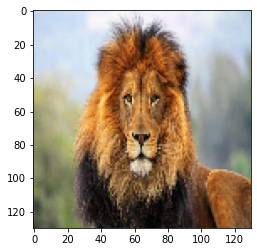

In [59]:
img = keras.preprocessing.image.load_img(
    'D:\\dataset\\test\\leaojuba-cke.jpg', target_size=(130, 130)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])
print("{:.2f}%".format(100 * np.max(score)))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)

In [38]:
model.save('modeloSalvoProjeto34Classes.pth')

INFO:tensorflow:Assets written to: modeloSalvoProjeto34Classes.pth\assets
